# Lab 4: Basic regression - Predict fuel efficiency



## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # we use this library to load the dataset
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Load data

In [2]:
# Load the 'mpg' dataset using seaborn library into a Pandas DataFrame
df = sns.load_dataset('mpg')

MPG dataset can be viewed online at  
https://github.com/mwaskom/seaborn-data/blob/master/mpg.csv

## Data Exploration - Pandas Review

### Show the first 5 rows of the dataset

In [3]:
#your code here

In [4]:
#Solution
df.head().T

,0,1,2,3,4
mpg,18.0,15.0,18.0,16.0,17.0
cylinders,8,8,8,8,8
displacement,307.0,350.0,318.0,304.0,302.0
horsepower,130.0,165.0,150.0,150.0,140.0
weight,3504,3693,3436,3433,3449
acceleration,12.0,11.5,11.0,12.0,10.5
model_year,70,70,70,70,70
origin,usa,usa,usa,usa,usa
name,chevrolet chevelle malibu,buick skylark 320,plymouth satellite,amc rebel sst,ford torino


### Show the size of the dataframe

In [5]:
#your code here

In [6]:
#Solution
df.shape

(398, 9)

### Find the columns name and their types (numerical or categorical)

In [7]:
#your code here

In [8]:
#Solution
print(df.columns)
df.dtypes

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')


,0
mpg,float64
cylinders,int64
displacement,float64
horsepower,float64
weight,int64
acceleration,float64
model_year,int64
origin,object
name,object


### Find the number of missing values in each column

In [9]:
#your code here

In [10]:
#solution
df.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0
name,0


### Handle the missing values in the dataframe

Since the number of missing values is low, we can simply drop the rows containing them. However, as a practice and review, let's substitute the missing values in the numerical columns (if any) with the mean of the respective column and the missing values in the categorical columns (if any) with the median of the respective column.

In [11]:
#your solution here

In [12]:
# I just have one numerical column with missing values
replacement = {"horsepower": df.horsepower.mean()}
df = df.fillna(replacement)
df.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model_year,0
origin,0
name,0


### Compute the average and the median weight

In [13]:
#your code here

In [14]:
# Average and median weights
# Solution

mean = df.weight.mean()
median = df.weight.median()

print(f'Average weight is {mean:.2f} kg')
print(f'Median weight is {median:.2f} kg')

Average weight is 2970.42 kg
Median weight is 2803.50 kg


### Find the number of cars that weight more than 2000 kgs

In [15]:
print((df.weight > 2000).sum())

354


### Find how many cars there are for each number of cylinders

In [16]:
#your code here

In [17]:
# Solution 1
df['cylinders'].value_counts()

,count
cylinders,
4,204
8,103
6,84
3,4
5,3


In [18]:
# solution 2
# First find the highest number of cylinders
df.cylinders.max()
for cyl in range(1, df.cylinders.max() + 1):
    count = (df.cylinders == cyl).sum()
    print(f'{cyl} cylinders: {count} models')

1 cylinders: 0 models
2 cylinders: 0 models
3 cylinders: 4 models
4 cylinders: 204 models
5 cylinders: 3 models
6 cylinders: 84 models
7 cylinders: 0 models
8 cylinders: 103 models


### Find what are the car models with number of cylinders (3 or 5)

In [19]:
#your code here

In [20]:
#Solution
df[(df.cylinders == 5) | (df.cylinders == 3)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
71,19.0,3,70.0,97.0,2330,13.5,72,japan,mazda rx2 coupe
111,18.0,3,70.0,90.0,2124,13.5,73,japan,maxda rx3
243,21.5,3,80.0,110.0,2720,13.5,77,japan,mazda rx-4
274,20.3,5,131.0,103.0,2830,15.9,78,europe,audi 5000
297,25.4,5,183.0,77.0,3530,20.1,79,europe,mercedes benz 300d
327,36.4,5,121.0,67.0,2950,19.9,80,europe,audi 5000s (diesel)
334,23.7,3,70.0,100.0,2420,12.5,80,japan,mazda rx-7 gs


### Show the `value_counts()` of `origin` column or show the unique values of this column.

In [21]:
#your code here

In [22]:
#Solution
df.origin.value_counts()

,count
origin,
usa,249
japan,79
europe,70


In [23]:
#solution
df.origin.unique()

array(['usa', 'japan', 'europe'], dtype=object)

## Data Preprocessing

### Use one hot encoding to change the categorical values of `origin` column to numerical values.

- use `pd.get_dummies()` method to do the encoding

In [24]:
df_encoded = pd.get_dummies(df, columns = ['origin'], dtype='int')

df_encoded.head().T

,0,1,2,3,4
mpg,18.0,15.0,18.0,16.0,17.0
cylinders,8,8,8,8,8
displacement,307.0,350.0,318.0,304.0,302.0
horsepower,130.0,165.0,150.0,150.0,140.0
weight,3504,3693,3436,3433,3449
acceleration,12.0,11.5,11.0,12.0,10.5
model_year,70,70,70,70,70
name,chevrolet chevelle malibu,buick skylark 320,plymouth satellite,amc rebel sst,ford torino
origin_europe,0,0,0,0,0
origin_japan,0,0,0,0,0


### Remove the name column form the dataframe to have all numerical dataframe.

In [25]:
#your code here

In [26]:
df_preprocessed = df_encoded.drop(columns = ['name'])
df_preprocessed.head().T

,0,1,2,3,4
mpg,18.0,15.0,18.0,16.0,17.0
cylinders,8.0,8.0,8.0,8.0,8.0
displacement,307.0,350.0,318.0,304.0,302.0
horsepower,130.0,165.0,150.0,150.0,140.0
weight,3504.0,3693.0,3436.0,3433.0,3449.0
acceleration,12.0,11.5,11.0,12.0,10.5
model_year,70.0,70.0,70.0,70.0,70.0
origin_europe,0.0,0.0,0.0,0.0,0.0
origin_japan,0.0,0.0,0.0,0.0,0.0
origin_usa,1.0,1.0,1.0,1.0,1.0


### Does the input needs reshaping?

In [27]:
#your code here

In [28]:
#No
df_preprocessed

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625,18.6,82,0,0,1


### Split the data into training and test sets and form `train_features`, `train_labels`, `test_features`, `test_labels`

In [29]:
from sklearn.model_selection import train_test_split
#your code here

In [30]:
#Solution
train_df, test_df = train_test_split(df_preprocessed, test_size=0.2)
train_df.shape, test_df.shape

((318, 10), (80, 10))

In [31]:
#Solution
train_labels = train_df.iloc[:, 0]
train_features = train_df.iloc[:, 1:]

test_labels = test_df.iloc[:, 0]
test_features = test_df.iloc[:, 1:]

train_features.shape, train_labels.shape, test_features.shape, test_labels.shape

((318, 9), (318,), (80, 9), (80,))

### For simplicity in the following steps, convert the dataset from a pandas DataFrame to a numpy array.

In [32]:
train_features = np.array(train_features)
train_labels = np.array(train_labels)
test_features = np.array(test_features)
test_labels = np.array(test_labels)

## Normalization layer

To ensure stable training of neural networks, we typically normalize the data. This process also enhances the convergence of the gradient descent algorithm.

The `tf.keras.layers.Normalization` is a clean and simple way to add feature normalization into your model.

The first step is to create the layer:

In [33]:
normalizer = tf.keras.layers.Normalization(axis=-1)

Then, fit the state of the preprocessing layer to the data by calling `Normalization.adapt`.

It calculates the mean and variance of each feature, and store them in the layer

In [34]:
normalizer.adapt(train_features)

When the layer is called, it returns the input data, with each feature independently normalized.

In [35]:
first = train_features[0]
print('First example:', first)
print()
print('Normalized:', normalizer(first).numpy())

First example: [4.000e+00 9.800e+01 7.000e+01 2.125e+03 1.730e+01 8.200e+01 0.000e+00
 0.000e+00 1.000e+00]

Normalized: [[-0.8590817  -0.9195343  -0.8977857  -0.9986451   0.61090344  1.610869
  -0.4573024  -0.5019646   0.773298  ]]


## **Approach #1:** Regression using `Linear Regression`

**You are welcome to use scikit-learn to perform linear regression on this dataset.**

However, here we aim to implement it using TensorFlow.

- As we saw in Lab Week 2, `logistic regression` is essentially a single neuron with a `sigmoid` activation function.

- Similarly, `linear regression` can be viewed as a single neuron with a `linear` activation function.

### **Step 1:** Linear regression model architecture

In [36]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(1, activation='linear')
])

### **Step 2:** Configure the model with Keras `Model.compile()`

The most important arguments to compile are the `loss` and the `optimizer`, since these define what will be optimized (`"mean_absolute_error"`) and how (using the `tf.keras.optimizers.Adam(learning_rate=0.1)`).

**arguments:**
- optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
- loss='mean_absolute_error'

In [37]:
#your code here

In [38]:
#Solution
linear_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

### **Step 3:** Train the model using the `Model.fit()` for `100` epochs, and store the output in a variable named history.

In [39]:
history = linear_model.fit(train_features, train_labels, epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 23.8299
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 22.0428  
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 21.1782 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19.8207  
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19.9121  
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.9584 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 16.9096
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.7166  
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.1613  
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.1586 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.8253 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.8948 
Epoch 13/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.8241  
Epoch 14/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.2396 
Epoch 15/100
10/10 ━━━━━━━━━━━━━━━━━━━

In [40]:
history.history

{'loss': [23.012950897216797,
  21.950971603393555,
  20.9453182220459,
  19.93137550354004,
  18.96152114868164,
  17.933185577392578,
  16.945524215698242,
  15.933820724487305,
  14.929919242858887,
  13.934464454650879,
  12.954239845275879,
  11.96436882019043,
  10.973431587219238,
  9.980196952819824,
  8.995901107788086,
  7.991440296173096,
  7.031935691833496,
  6.108212471008301,
  5.2288498878479,
  4.439654350280762,
  3.7506356239318848,
  3.2459471225738525,
  2.838311195373535,
  2.6468265056610107,
  2.5043506622314453,
  2.4486982822418213,
  2.440401315689087,
  2.411717414855957,
  2.4240994453430176,
  2.400832414627075,
  2.433255672454834,
  2.4222445487976074,
  2.398106336593628,
  2.3980414867401123,
  2.396251678466797,
  2.3877604007720947,
  2.3928658962249756,
  2.3976211547851562,
  2.388077735900879,
  2.3863399028778076,
  2.3847854137420654,
  2.39862322807312,
  2.4005141258239746,
  2.3946735858917236,
  2.3968007564544678,
  2.391008138656616,
  2.4

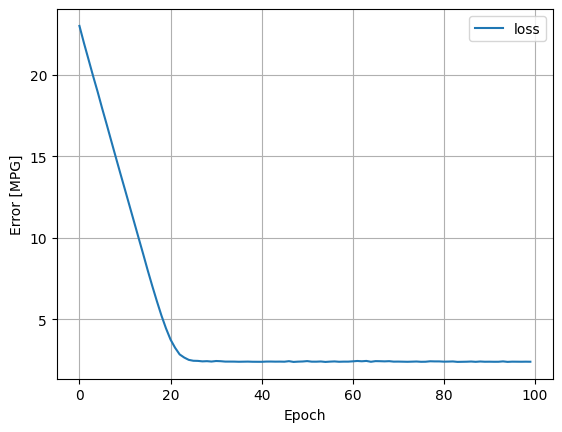

In [41]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

### **Step 4:** Evaluate the linear model on the test set using Keras `Model.evaluate()` and see the `mean_absolute_error` and save the result for future comparison.

In [42]:
#your code here

In [43]:
#Solution
test_results = {}

test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

test_results

{'linear_model': 2.776373863220215}

## **Approach #2:** Regression using a Deep Neural Network (DNN)

### Solve the same problem and using deep neural network with the sample architecture;
- 1st hidden layer no. of units =  64
- 2nd hidden layer no. of units = 64
- Choose appropriate `activation` functions for hidden and output layers

In [44]:
#your code here

## Compare the evaluation result of the two approaches, i.e., linear regression and deep neural network.

In [45]:
#your code here

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 22.9315
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 23.2376
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.4970  
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20.5928  
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19.4780  
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 16.8162
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.0090  
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.6069 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.2396  
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.5165 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.8311  
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.0315 
Epoch 13/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0365 
Epoch 14/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.4240 
Epoch 15/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2

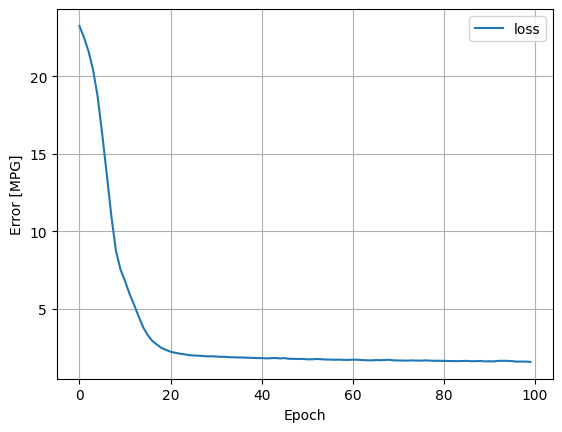

In [46]:
#Solution
model_dnn = keras.Sequential([
      normalizer,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

model_dnn.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

history_dnn = model_dnn.fit(
    train_features,
    train_labels,
    epochs=100)

plot_loss(history_dnn)

In [47]:
#Solution
test_results['dnn_model'] = model_dnn.evaluate(test_features, test_labels, verbose=0)

test_results

{'linear_model': 2.776373863220215, 'dnn_model': 2.1105384826660156}

## Run the deep neural network model without the normalization layer and plot the loss convergence curve result.

In [48]:
#your code here

In [49]:
#Solution
model_no_norm = keras.Sequential([
      # normalizer,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

model_no_norm.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

history_no_norm = model_no_norm.fit(
    train_features,
    train_labels,
    epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 319.0812
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 66.3672   
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20.8751
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.4639 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.4090 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.2325 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.4940 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.8197  
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.0287  
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.8175 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.4366  
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.2662 
Epoch 13/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.2641  
Epoch 14/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.9262 
Epoch 15/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5

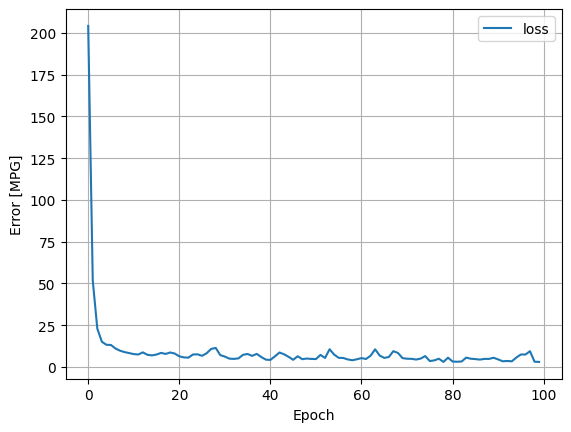

In [50]:
# Solution
plot_loss(history_no_norm)


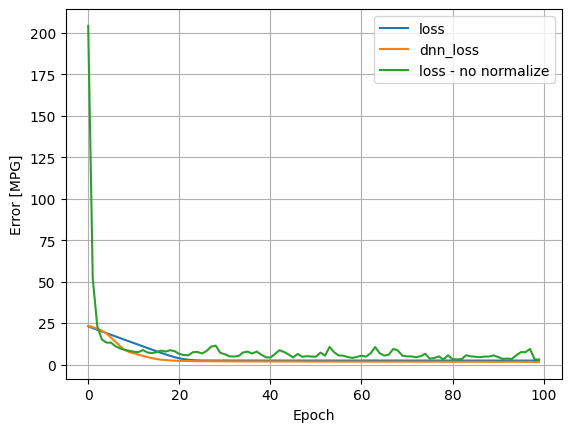

In [51]:
  #Solution
  plt.plot(history.history['loss'], label='loss - linear regression')
  plt.plot(history_dnn.history['loss'], label='loss - dnn')
  plt.plot(history_no_norm.history['loss'], label='loss - no normalizer')

  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)